In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
#labelling the classes and loading the train and test data
X = data.drop([4], axis=1)
labels = data.iloc[:,4]
train_data, test_data, train_target, test_target = train_test_split(X, labels, test_size = 0.25)

In [6]:
#Importing svc from scikitlearn
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_data, train_target)
predicted = svclassifier.predict(test_data)
#confusion matrix
print('Confusion Matrix',confusion_matrix(test_target,predicted))
print('Classification Report\n',classification_report(test_target,predicted))

Confusion Matrix [[ 8  0  0]
 [ 0 17  0]
 [ 0  0 13]]
Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [7]:
#PCA

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='1', ylabel='2'>

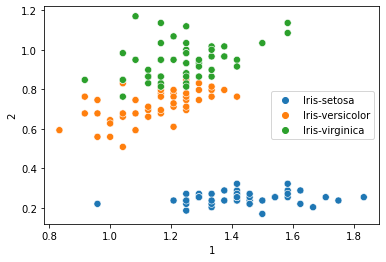

In [11]:
import seaborn as sns
N_Data = pd.DataFrame([])
labels = list(data[4])
a,b = data.shape
for i in range(b-1):
    N_Data[i] = data[i]/(max(data[i])-min(data[i]))
sns.scatterplot(N_Data[1],N_Data[2], hue = labels,s = 50)

In [13]:
#normalizing Data
mean_X = []
for i in range(b-1):
    mean_X.append(np.mean(data[i]))
#convertng my data into a matrix form
data_m = N_Data.to_numpy()
Cov_M = np.cov(np.transpose(data_m))
w,v = np.linalg.eig(Cov_M)
print('Eigen Values:\n',w)
print('Eigen vectors:',v)

Eigen Values:
 [0.23231168 0.03239279 0.00963728 0.00175337]
Eigen vectors: [[ 0.4252893  -0.42100611 -0.71434339  0.36276216]
 [-0.14612219 -0.90470509  0.33510219 -0.21877734]
 [ 0.61610511  0.06432645 -0.06825927 -0.78205964]
 [ 0.64667752  0.01116485  0.61054133  0.45708076]]


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


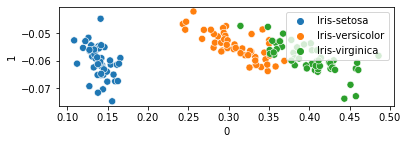

In [14]:
#Projection Matrix
P_Mat = np.delete(v,(2,3),1)
Y = np.matmul(data_m,Cov_M)
Y = np.matmul(Y,P_Mat)
Y = pd.DataFrame(Y)
Y[2] = labels
plt.subplot(2,1,2)
sns.scatterplot(Y[0],Y[1], hue = labels,s = 50)
plt.show()